# **Machine Learning - Assignment 6**

*These lab assignments are new in the Machine and Deep Learning course. We'd like to hear what you think!*

*Please post any feedback you have on Brightspace. Thanks!*


---

## Introduction - Evaluation in Machine Learning

In this assignment, you will learn about common evaluation techniques in machine learning. This includes evaluating the error of the classifier, analyzing the learning curves, and performing cross-validation.

**Prerequisites:**
* Basic working knowledge of multivariate statistics and linear algebra
* Basic knowledge of Python and Numpy. Recommended tutorial for Python and Numpy [here](https://cs231n.github.io/python-numpy-tutorial/).

**Learning objectives:**
* Can explain what sources of performance variability there are in machine learning
* Knowing what a learning curve is
* Can understand the difference between train and test error
* Can explain what cross-validation is and how it is used

**Exercises types:**
* **Pen \& Paper** - Some exercises will ask you to write down mathematical derivations, calculations, explanations, or simple plots and representations. You can perform these exercises on paper or using a LaTeX editor.
* **Coding** - Some exercises will ask you to write Python code.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

---

## 1 - Sources of Variation (**Coding**)

### **Exercise 1.1**

In this exercise we investigate the difference in behavior of the error on the training and the test set. Generate a large test set and study the variations in the classification error based on repeatedly generated training sets:

In [ ]:
#TODO

#POSSIBLE SOLUTION

#create a fixed test set
X_test, y_test = datasets.make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)

#import linear classifier from sklearn
from sklearn.linear_model import LogisticRegression

#Create an instance of the classifier
clf = LogisticRegression()


LogisticRegression()

In [ ]:
#create a random training set multiple times modifying the random state

X_train, y_train = datasets.make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=5)

#Train the classifier
clf.fit(X_train, y_train)

#Run the cell multiple times with different random states to see the difference in performance
print(clf.score(X_test, y_test))

0.823


#### (a) What causes the variation in the error?

Now do the same for different test sets:

In [ ]:
#TODO

#POSSIBLE SOLUTION

#create a fixed training set
X_train, y_train = datasets.make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=1)

#import linear classifier from sklearn
from sklearn.linear_model import LogisticRegression

#Create an instance of the classifier
clf = LogisticRegression()

#Train the classifier
clf.fit(X_train, y_train)

In [ ]:
#create a large test set from the same distribution multiple times and study the difference in performance
X_test, y_test = datasets.make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)

#Run the cell multiple times with different random states to see the difference in performance
print(clf.score(X_test, y_test))

#### (b) Again explain what causes the variance observed in the results.

---

## 2 - Learning Curves (**Coding**)

### **Exercise 2.1**

Using prtools lib, generate Highleyman classes (gendath) with a 1000 samples per class. Enlarge the feature dimensionality of this set by adding 60 dimensions of class independent randomness, i.e., plain noise. After that, use the function pr.cleval to generate learning curves for nmc, ldc, and qdc using 64, 128, 256, and 512 objects in the training set (make sure that you repeat often enough. . . ). Note that cleval automatically plots the learning curves.

In [ ]:
!git clone https://github.com/DMJTax/prtools.git
!pip install -e prtools
import prtools as pr

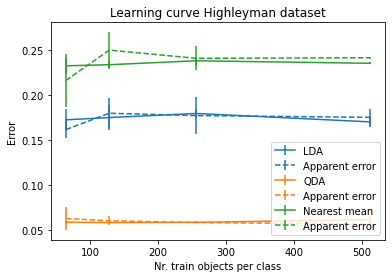

In [ ]:
#TODO

#POSSIBLE SOLUTION
#for this specific exercise, we need to use prtools as it gives
#us the possibility to generate a this specific kind of data

#generate a hyghleyman dataset with a 1000 samples per class
a = pr.gendath([1000,1000])

#add some noise to the dataset
noise = np.random.randn(2000, 60)
a.concatenate(noise,axis=1)


#use cleval to evaluate the performance of a classifier
e = pr.cleval(a, pr.ldc(), trainsize=[64, 128, 256, 512])
f = pr.cleval(a,pr.qdc(), trainsize=[64, 128, 256, 512])
g = pr.cleval(a,pr.nmc(), trainsize=[64, 128, 256, 512])



#### (a) Can you explain the overall behavior of these curves?

#### (b) Explain why the curves intersect. Which classifier performs best?

#### (c) What do you expect the limiting behavior of learning curves is? That is, if we were able to   train on more and more data?

---

## 3 - Cross-Validation (**Coding**)

### **Exercise 3.1**

Generate a small data set, say, with 10 objects per class.

In [ ]:
#TODO

#POSSIBLE SOLUTION

from sklearn.datasets import make_classification

#generate a small dataset with 10 objects per class, 3 classes

X, y = make_classification(n_samples=30, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, n_classes=3, random_state=42)

#### (a) Using n-fold cross-validation,make plots for the error rates for kNN and 1NN over different values of n. Also calculate the standard deviation of the error estimate, e.g., by performing the cross-validation 10 times

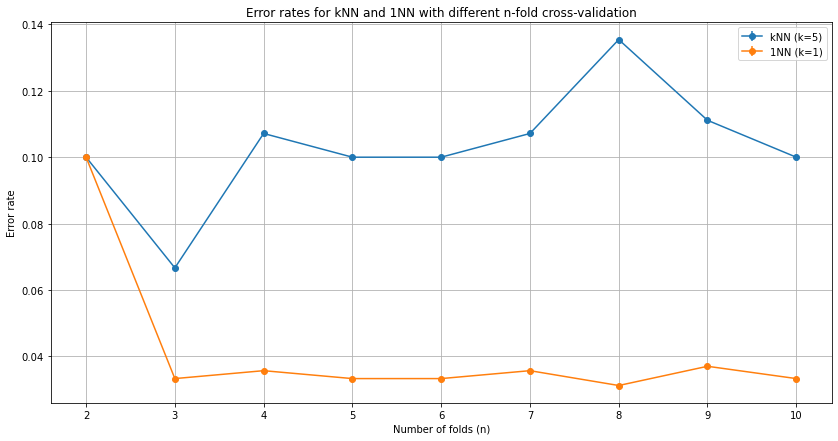

In [ ]:
#TODO

#POSSIBLE SOLUTION

from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

# Define the range of n for n-fold cross-validation
n_splits_range = range(2, 11)

# Initialize lists to store mean error rates and standard deviations
error_rates_knn = []
error_std_knn = []
error_rates_1nn = []
error_std_1nn = []

# Perform cross-validation and collect error rates for kNN (e.g. k = 5) and 1NN
for n_splits in n_splits_range:
    knn_errors = []
    knn_1_errors = []
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    for _ in range(10):  # Repeat the cross-validation process 10 times
        knn = KNeighborsClassifier(n_neighbors=5)
        knn_1 = KNeighborsClassifier(n_neighbors=1)

        knn_scores = cross_val_score(knn, X, y, cv=skf, scoring='accuracy')
        knn_1_scores = cross_val_score(knn_1, X, y, cv=skf, scoring='accuracy')

        knn_errors.append(1 - np.mean(knn_scores))
        knn_1_errors.append(1 - np.mean(knn_1_scores))

    error_rates_knn.append(np.mean(knn_errors))
    error_std_knn.append(np.std(knn_errors))
    error_rates_1nn.append(np.mean(knn_1_errors))
    error_std_1nn.append(np.std(knn_1_errors))

# Plotting the error rates with standard deviation
plt.figure(figsize=(14, 7))
plt.errorbar(n_splits_range, error_rates_knn, yerr=error_std_knn, label='kNN (k=5)', fmt='-o')
plt.errorbar(n_splits_range, error_rates_1nn, yerr=error_std_1nn, label='1NN (k=1)', fmt='-o')
plt.xlabel('Number of folds (n)')
plt.ylabel('Error rate')
plt.title('Error rates for kNN and 1NN with different n-fold cross-validation')
plt.legend()
plt.grid(True)
plt.show()




#### (b) What do you notice about the estimated error rates? What is the general trend (maybe you should redo the data generation and the cross-validation a couple of times).

#### (c) What happens to the variance of the estimates for varying n? Again, we are interested in the general trend.

#### (d) How would the observations change if one would repeat the experiments with much larger dataset? Would they change?